In [1]:
import os, sys, glob
import seaborn as sns
sys.path.insert(0, "../partitura")
sys.path.insert(0, "../")
import partitura as pt
import matplotlib.pyplot as plt
from collections import OrderedDict
import numpy as np
import pandas as pd
import numpy.lib.recfunctions as rfn

SAMPLES_DIR = 'artifacts/samples/EVAL-targetgen_noise-lw11111-len200-beta0.02-steps1000-epsilon-TransferFalse-ssfrac1-cfdg_ddpm-w=1.2-dim=48'
DEXTER_SAMPLES_DIR = 'artifacts/samples/EVAL-dexter'
BM_SAMPLES_DIR = 'artifacts/samples/EVAL-basismixer'
VN_SAMPLES_DIR = 'artifacts/samples/EVAL-virtuosonet'


In [2]:
dexter_eval_dir1 = glob.glob(f"{DEXTER_SAMPLES_DIR}/**/*_distribution_all.csv", recursive=True)
dexter_eval_dir2 = glob.glob(f"{DEXTER_SAMPLES_DIR}/**/*label_distribution*.csv", recursive=True)
bm_eval_dir1 = glob.glob(f"{BM_SAMPLES_DIR}/**/*_distribution_all.csv", recursive=True)
bm_eval_dir2 = glob.glob(f"{BM_SAMPLES_DIR}/**/*label_distribution*.csv", recursive=True)
vn_eval_dir1 = glob.glob(f"{VN_SAMPLES_DIR}/**/*_distribution_all.csv", recursive=True)
vn_eval_dir2 = glob.glob(f"{VN_SAMPLES_DIR}/**/*label_distribution*.csv", recursive=True)


In [2]:
def replace_value(table):
    table = table.replace([np.inf, -np.inf], np.nan)
    table = table.replace(["--"], np.nan)
    # if one column has nan then turn all of them into nan (to keep the column)
    for col in table.columns:
        if np.nan in table[col].to_list():
            table[col] = np.nan

    for value in table.iloc[1]:
        if float(value) < 0:
            table.iloc[1] = table.iloc[1].replace(value, np.nan) # replace dummy value in KL divergence
    return table

def get_table_mean(eval_dir1, eval_dir2, N=10000, std=False):

    all_eval_table = [replace_value(pd.read_csv(eval_csv_path)) for eval_csv_path in eval_dir1][:N] # mean ignores nan but not ignores inf. So replace inf with nan
    print(f"number of available distribution in dir1: {len(all_eval_table)}")
    all_eval_table = pd.concat(all_eval_table)
    if std:
        eval_table_mean = all_eval_table.groupby(level=0).std()
    else:
        eval_table_mean = all_eval_table.groupby(level=0).mean()
    eval_table_mean = eval_table_mean.set_index(pd.Index(["Deviation", "KL Divergence", "Correlation"]))

    all_eval_table = [replace_value(pd.read_csv(eval_csv_path)) for eval_csv_path in eval_dir2][:N] # mean ignores nan but not ignores inf. So replace inf with nan
    print(f"number of available distribution in dir2: {len(all_eval_table)}")
    all_eval_table = pd.concat(all_eval_table)
    if std:
        eval_table_mean_ = all_eval_table.groupby(level=0).std()
    else:
        eval_table_mean_ = all_eval_table.groupby(level=0).mean()
    eval_table_mean_ = eval_table_mean_.set_index(pd.Index(["Deviation", "KL Divergence", "Correlation"]))

    eval_table_mean.iloc[2] = eval_table_mean_.iloc[2] # for correlation take the average of individual comparison. First two are aggregated already.
    return eval_table_mean


In [4]:
get_table_mean(dexter_eval_dir1, dexter_eval_dir2)


number of available distribution in dir1: 498
number of available distribution in dir2: 3028


,articulation_feature.kor,asynchrony_feature.pitch_cor,asynchrony_feature.delta,dynamics_feature.agreement,dynamics_feature.consistency_std,dynamics_feature.ramp_cor,dynamics_feature.tempo_cor,pedal_feature.onset_value,tempo_curve,vel_curve
Deviation,2.236841,-2.177490,3.435486,-0.027532,0.738609,-0.280998,0.577490,-2.195320,2.721552,1.487977
KL Divergence,1.642130,0.201349,1.290560,0.065082,0.285808,0.426701,0.967587,0.336464,4.263473,0.711357
Correlation,0.113356,0.578579,0.252846,0.112487,0.921533,0.141151,0.025243,0.019731,0.155456,0.121621


In [5]:
get_table_mean(dexter_eval_dir1, dexter_eval_dir2, std=True)

number of available distribution in dir1: 498
number of available distribution in dir2: 3028


,articulation_feature.kor,asynchrony_feature.pitch_cor,asynchrony_feature.delta,dynamics_feature.agreement,dynamics_feature.consistency_std,dynamics_feature.ramp_cor,dynamics_feature.tempo_cor,pedal_feature.onset_value,tempo_curve,vel_curve
Deviation,2.762736,1.656787,2.211605,1.050484,2.218119,2.445407,1.662917,2.133051,2.655413,2.122438
KL Divergence,3.637267,0.338788,3.167221,0.048646,0.496696,1.131849,7.746528,0.364597,10.660476,1.377119
Correlation,0.179687,0.256114,0.214272,0.798758,0.157709,0.730577,0.387846,0.141623,0.174764,0.229000


In [5]:
get_table_mean(bm_eval_dir1, bm_eval_dir2)

number of available distribution in dir1: 317
number of available distribution in dir2: 2455


,articulation_feature.kor,asynchrony_feature.pitch_cor,asynchrony_feature.delta,dynamics_feature.agreement,dynamics_feature.consistency_std,dynamics_feature.ramp_cor,dynamics_feature.tempo_cor,pedal_feature.onset_value,tempo_curve,vel_curve
Deviation,0.623404,-1.194042,4.100043,-0.074719,-0.677959,-0.364591,-0.054517,-3.468614,-0.102990,-0.669664
KL Divergence,0.928901,0.142090,4.044515,0.095778,0.123519,1.542604,1.989317,NaN,0.986599,0.162737
Correlation,-0.004024,0.335045,0.178210,0.026065,0.921321,0.040398,0.009771,NaN,0.025591,0.086780


In [6]:
get_table_mean(bm_eval_dir1, bm_eval_dir2, std=True)


number of available distribution in dir1: 317
number of available distribution in dir2: 2455


,articulation_feature.kor,asynchrony_feature.pitch_cor,asynchrony_feature.delta,dynamics_feature.agreement,dynamics_feature.consistency_std,dynamics_feature.ramp_cor,dynamics_feature.tempo_cor,pedal_feature.onset_value,tempo_curve,vel_curve
Deviation,3.155152,1.410252,1.785580,1.331560,1.649029,2.544932,1.411037,1.456524,2.448854,1.488113
KL Divergence,2.156825,0.275835,5.151895,0.043194,0.236915,5.436000,4.504663,NaN,2.552696,0.216531
Correlation,0.136367,0.254295,0.221922,0.879954,0.170898,0.769728,0.394611,NaN,0.139221,0.238150


In [6]:
get_table_mean(vn_eval_dir1, vn_eval_dir2)

number of available distribution in dir1: 132
number of available distribution in dir2: 812


,articulation_feature.kor,asynchrony_feature.pitch_cor,asynchrony_feature.delta,dynamics_feature.agreement,dynamics_feature.consistency_std,dynamics_feature.ramp_cor,dynamics_feature.tempo_cor,pedal_feature.onset_value,tempo_curve,vel_curve
Deviation,1.948697,-2.207829,4.144652,-0.042964,0.041702,0.603489,0.448030,-1.558939,0.853589,0.096324
KL Divergence,1.656822,0.181112,4.114065,0.063581,0.574387,1.815725,0.899586,0.330780,0.409534,0.105439
Correlation,0.061078,0.549085,0.263177,0.025166,0.904298,0.098564,-0.049170,0.022779,0.071266,0.331232


In [4]:
get_table_mean(vn_eval_dir1, vn_eval_dir2)

number of available distribution in dir1: 383
number of available distribution in dir2: 2941


,articulation_feature.kor,asynchrony_feature.pitch_cor,asynchrony_feature.delta,dynamics_feature.agreement,dynamics_feature.consistency_std,dynamics_feature.ramp_cor,dynamics_feature.tempo_cor,pedal_feature.onset_value,tempo_curve,vel_curve
Deviation,1.924129,-1.670672,4.388021,-0.409823,-1.077763,-0.652100,0.376094,-1.169407,0.522293,0.154400
KL Divergence,1.660157,0.152841,4.834574,0.094467,0.057384,0.350058,0.801331,0.348343,0.650698,0.098878
Correlation,0.054552,0.557180,0.293127,0.046698,0.935851,0.120650,-0.026397,0.004012,0.090103,0.401514


In [7]:
get_table_mean(vn_eval_dir1, vn_eval_dir2, std=True)

number of available distribution in dir1: 132
number of available distribution in dir2: 812


,articulation_feature.kor,asynchrony_feature.pitch_cor,asynchrony_feature.delta,dynamics_feature.agreement,dynamics_feature.consistency_std,dynamics_feature.ramp_cor,dynamics_feature.tempo_cor,pedal_feature.onset_value,tempo_curve,vel_curve
Deviation,2.992600,1.540669,1.703700,1.019989,2.254084,2.577201,1.702938,1.850965,2.541250,1.127126
KL Divergence,7.590580,0.209129,13.041758,0.034184,2.748384,5.945063,3.076613,0.613781,0.875946,0.061101
Correlation,0.172868,0.255135,0.186532,0.832588,0.160879,0.729184,0.393677,0.133355,0.179125,0.265640


## Examples and plots for demonstration

In [3]:
piece_name = "batch=0/15_Beethoven_Piano_Sonatas_11-1"

BM = f"artifacts/samples/EVAL-basismixer/{piece_name}"
VN = f"artifacts/samples/EVAL-virtuosonet/{piece_name}"
DX = f"artifacts/samples/EVAL-targetgen_noise-lw11111-len200-beta0.02-steps1000-epsilon-TransferFalse-ssfrac1-cfdg_ddpm-w=1.2-dim=48/epoch=0/{piece_name}"
GT1 = f"artifacts/samples/GT/ASAP_Beethoven_Piano_Sonatas_11-1_seg4/5207_Beethoven_Piano_Sonatas_11-1"
GT2 = f"artifacts/samples/GT/ASAP_Beethoven_Piano_Sonatas_11-1_seg4/5227_Beethoven_Piano_Sonatas_11-1"
GT3 = f"artifacts/samples/GT/ASAP_Beethoven_Piano_Sonatas_11-1_seg4/5247_Beethoven_Piano_Sonatas_11-1"
GT4 = f"artifacts/samples/GT/ASAP_Beethoven_Piano_Sonatas_11-1_seg4/5267_Beethoven_Piano_Sonatas_11-1"

score = pt.load_score('../Datasets/asap-dataset-alignment/Beethoven/Piano_Sonatas/11-1/xml_score.musicxml')
snote_ids = np.load('/import/c4dm-datasets-ext/DiffPerformer/snote_ids/N=200/ASAP_Beethoven_Piano_Sonatas_11-1_seg4.npy')

In [2]:
piece_name = "batch=0/5_Chopin_Etudes_op_10_4"

BM = f"artifacts/samples/EVAL-basismixer/{piece_name}"
VN = f"artifacts/samples/EVAL-virtuosonet/{piece_name}"
DX = f"artifacts/samples/EVAL-targetgen_noise-lw11111-len200-beta0.02-steps1000-epsilon-TransferFalse-ssfrac1-cfdg_ddpm-w=1.2-dim=48/epoch=0/{piece_name}"
GT1 = f"artifacts/samples/GT/ASAP_Chopin_Etudes_op_10_4_seg4/1541_Chopin_Etudes_op_10_4"
GT2 = f"artifacts/samples/GT/ASAP_Chopin_Etudes_op_10_4_seg4/1553_Chopin_Etudes_op_10_4"
GT3 = f"artifacts/samples/GT/ASAP_Chopin_Etudes_op_10_4_seg4/1565_Chopin_Etudes_op_10_4"
GT4 = f"artifacts/samples/GT/ASAP_Chopin_Etudes_op_10_4_seg4/1577_Chopin_Etudes_op_10_4"

score = pt.load_score('../Datasets/asap-dataset-alignment/Chopin/Etudes_op_10/4/xml_score.musicxml')
snote_ids = np.load('/import/c4dm-datasets-ext/DiffPerformer/snote_ids/N=200/ASAP_Chopin_Etudes_op_10_4_seg4.npy')

/homes/hz009/Research/DExter/../partitura/partitura/io/importmusicxml.py:946: UserWarning: ignoring direction type: metronome {'parentheses': 'yes', 'default-x': '-34.81', 'default-y': '40.00', 'relative-x': '34.81', 'relative-y': '19.00'}
  warnings.warn("ignoring direction type: {} {}".format(dt.tag, dt.attrib))
/homes/hz009/Research/DExter/../partitura/partitura/directions.py:533: UserWarning: error parsing "m.g." (UnexpectedCharacters)
  warnings.warn('error parsing "{}" ({})'.format(string, type(e).__name__))


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


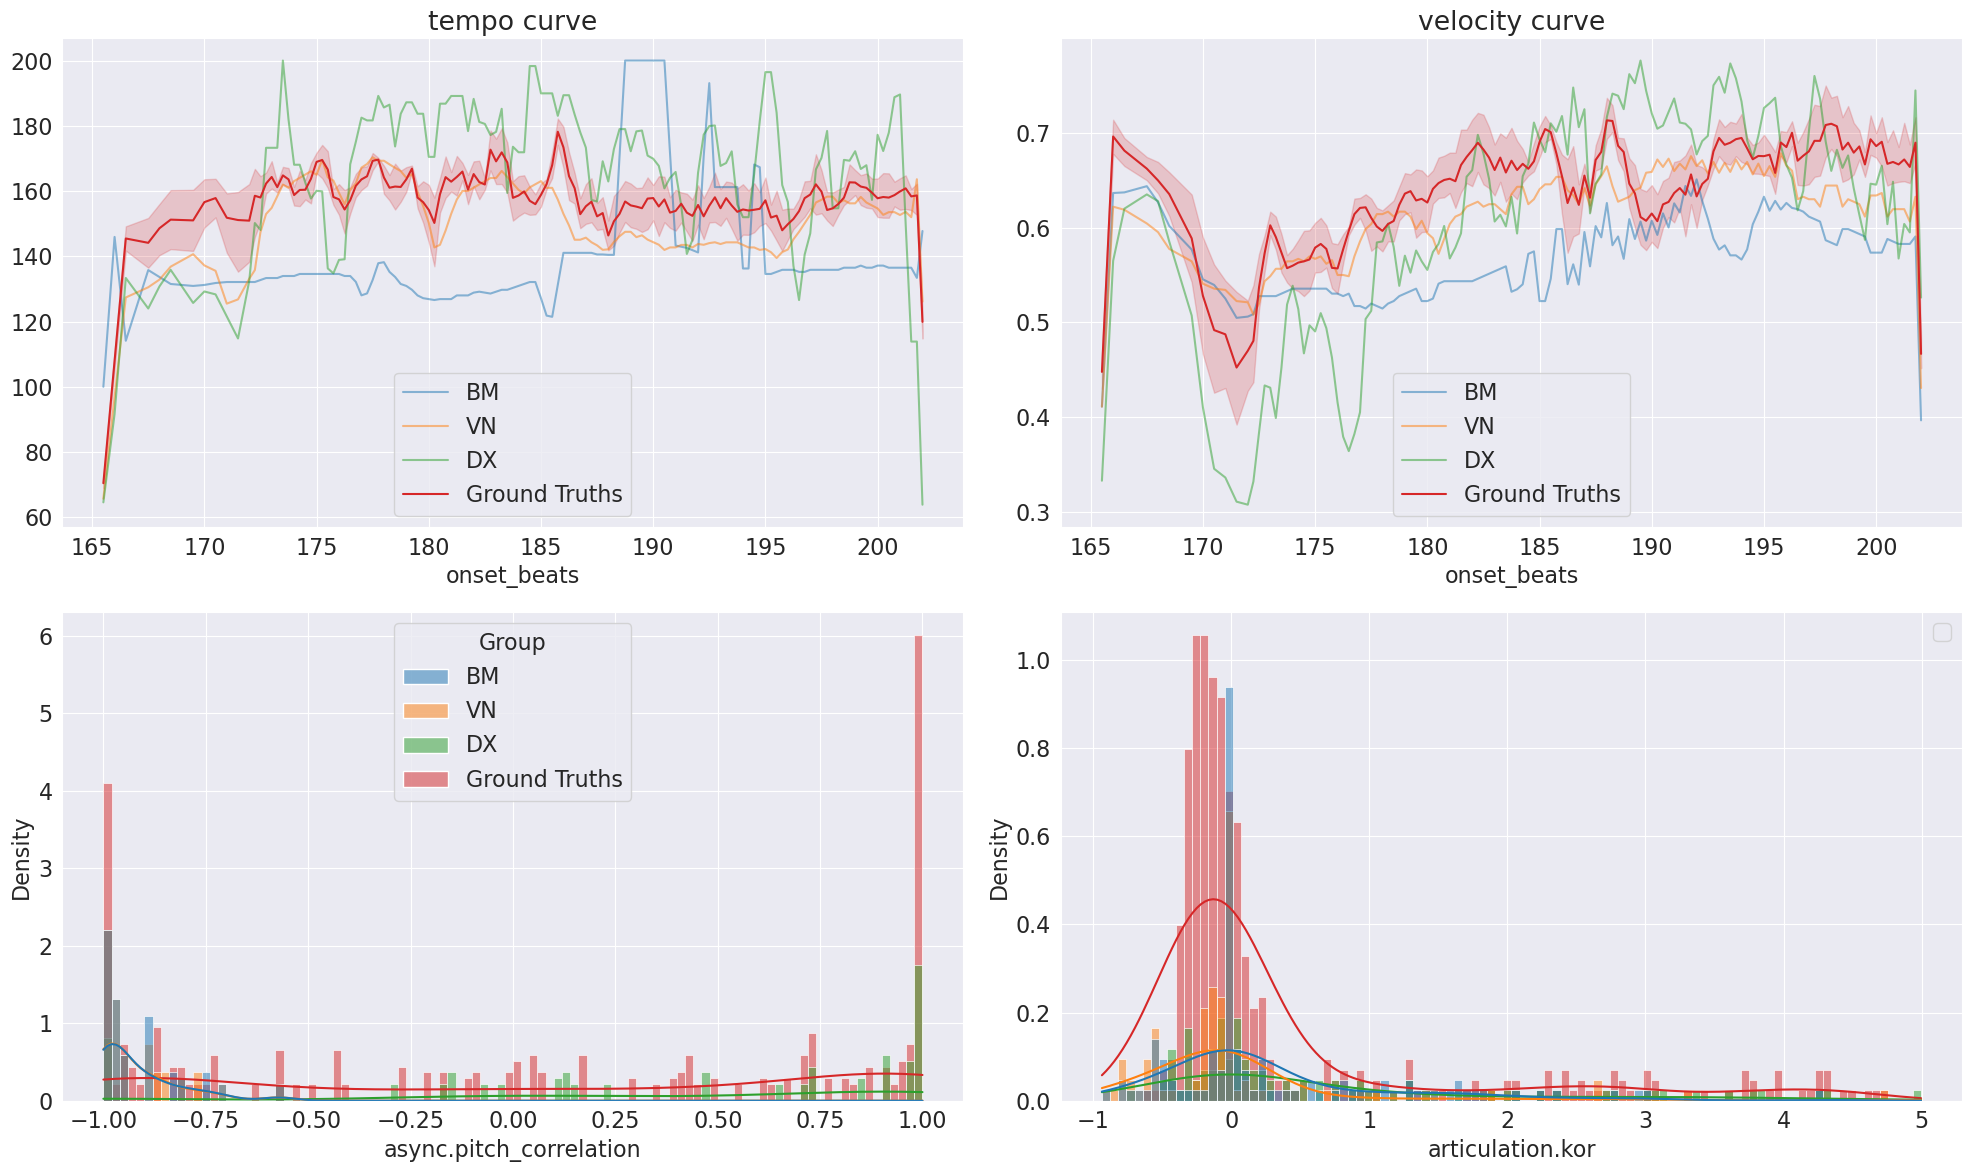

In [9]:
from scipy.interpolate import UnivariateSpline

plt.rcParams['font.size'] = 16
sns.set_style('darkgrid')
# unfold the score if necessary (mostly for ASAP)
if ("-" in snote_ids[0] and 
    "-" not in score.note_array()['id'][0]):
    score = pt.score.unfold_part_maximal(pt.score.merge_parts(score.parts)) 
na = score.note_array()
na = na[np.in1d(na['id'], snote_ids)]
onset_beats = np.unique(na['onset_beat'])

fig, ax = plt.subplots(2, 2, figsize=(20, 12))

pcodecs = []

GT_tempos, GT_vels = [], []
PSET_PC, PSET_KOR, PC, KOR = [], [], [], []
labels = [
    "BM", 
    "VN", "DX"]
for idx, name in enumerate([
    BM, 
    VN, DX, 
    GT1, GT2, GT3, GT4]):

    tv_curves = pd.read_csv(f"{name}_tv_feats.csv")
    onset_beats, tempo_curve, velocity_curve = tv_curves['onset_beats'], tv_curves['performed_tempo'], tv_curves['performed_vel']
    feats = pd.read_csv(f"{name}_feats_pred.csv")

    tempo_curve = np.clip(tempo_curve, 0, 200)

    if name == BM:
        N = 2
    else:
        N = 4
    tempo_curve_smooth = np.convolve(tempo_curve, np.ones(N)/N, mode='same')
    velocity_curve_smooth = np.convolve(velocity_curve, np.ones(3)/3, mode='same')

    if np.isinf(tempo_curve).any():
        raise RuntimeError("inf in tempo")
    
    pc = feats['asynchrony_feature.pitch_cor']
    kor = feats['articulation_feature.kor']
    PC.extend(pc[pc != 0])
    KOR.extend(kor[(kor != -1) & (kor != 5)])

    if idx < 3:
        sns.lineplot(x=onset_beats, y=tempo_curve_smooth, ax=ax[0][0], label=labels[idx], alpha=0.5)
        sns.lineplot(x=onset_beats, y=velocity_curve_smooth, ax=ax[0][1], label=labels[idx], alpha=0.5)
        PSET_PC.extend([labels[idx]] * len(pc[pc != 0]))
        PSET_KOR.extend([labels[idx]] * len(kor[(kor != -1) & (kor != 5)]))
    else:
        GT_tempos.extend(tempo_curve_smooth)
        GT_vels.extend(velocity_curve_smooth)
        PSET_PC.extend(["Ground Truths"] * len(pc[pc != 0]))
        PSET_KOR.extend(["Ground Truths"] * len(kor[(kor != -1) & (kor != 5)]))
    # ax[0].plot(onset_beats, tempo_curve)
    # ax[1].plot(onset_beats, velocity_curve)

data_pc = pd.DataFrame({"Group": PSET_PC, "async.pitch_correlation": PC,})
data_kor = pd.DataFrame({"Group": PSET_KOR, "articulation.kor": KOR,})

sns.lineplot(x=np.tile(onset_beats, 4), y=GT_tempos, ax=ax[0][0], label='Ground Truths')
sns.lineplot(x=np.tile(onset_beats, 4), y=GT_vels, ax=ax[0][1], label='Ground Truths')
# ax[0][0].set_ylim(-80, 500)
ax[0][0].set_title("tempo curve")
ax[0][1].set_title("velocity curve")
sns.histplot(data=data_pc, x="async.pitch_correlation", hue='Group', ax=ax[1][0], bins=100, stat='density', kde=True)
sns.histplot(data=data_kor, x="articulation.kor", hue='Group', ax=ax[1][1], bins=100, stat='density', kde=True)

plt.tight_layout()
plt.legend()



## Transfer

In [13]:
T_PATH = "artifacts/samples/EVAL-targetgen_noise-lw11111-len200-beta0.02-steps1000-epsilon-TransferTrue-ssfrac1-cfdg_ddpm-w=1.2-dim=48"
T34_PATH = "artifacts/samples/EVAL-targetgen_noise-lw11111-len200-beta0.02-steps1000-epsilon-TransferTrue-ssfrac0.75-cfdg_ddpm-w=1.2-dim=48"
T12_PATH = "artifacts/samples/EVAL-targetgen_noise-lw11111-len200-beta0.02-steps1000-epsilon-TransferTrue-ssfrac0.5-cfdg_ddpm-w=1.2-dim=48"
T14_PATH = "artifacts/samples/EVAL-targetgen_noise-lw11111-len200-beta0.02-steps1000-epsilon-TransferTrue-ssfrac0.25-cfdg_ddpm-w=1.2-dim=48"

# piece_name = "batch=0/1_Bach_Fugue_bwv_854"
# piece_name = "batch=0/5_Mozart_K331_1st-mov"
piece_name = "batch=0/8_Chopin_Ballades_4"
# piece_name = "batch=0/10_Haydn_Keyboard_Sonatas_50-1_no_repeat"

DX = f"{T_PATH}/epoch=0/{piece_name}"
DX34 = f"{T34_PATH}/epoch=0/{piece_name}"
DX12 = f"{T12_PATH}/epoch=0/{piece_name}"
DX14 = f"{T14_PATH}/epoch=0/{piece_name}"

SOURCE = f"{T34_PATH}/epoch=0/{piece_name}_source"
LABEL = f"{T34_PATH}/epoch=0/{piece_name}_label"


2
0.21214374991360557 0.7245332878889514
0.20626757956725153 0.770382857760044
3
0.18688103325520955 0.6915482086032485
0.4254048903614827 0.6921929846445991
4
0.17603190462314278 0.7866743272002812
0.2626198196820603 0.731290192951782
5
0.21358453016942497 0.6963565087731001
0.3005562553578256 0.7591299505797837


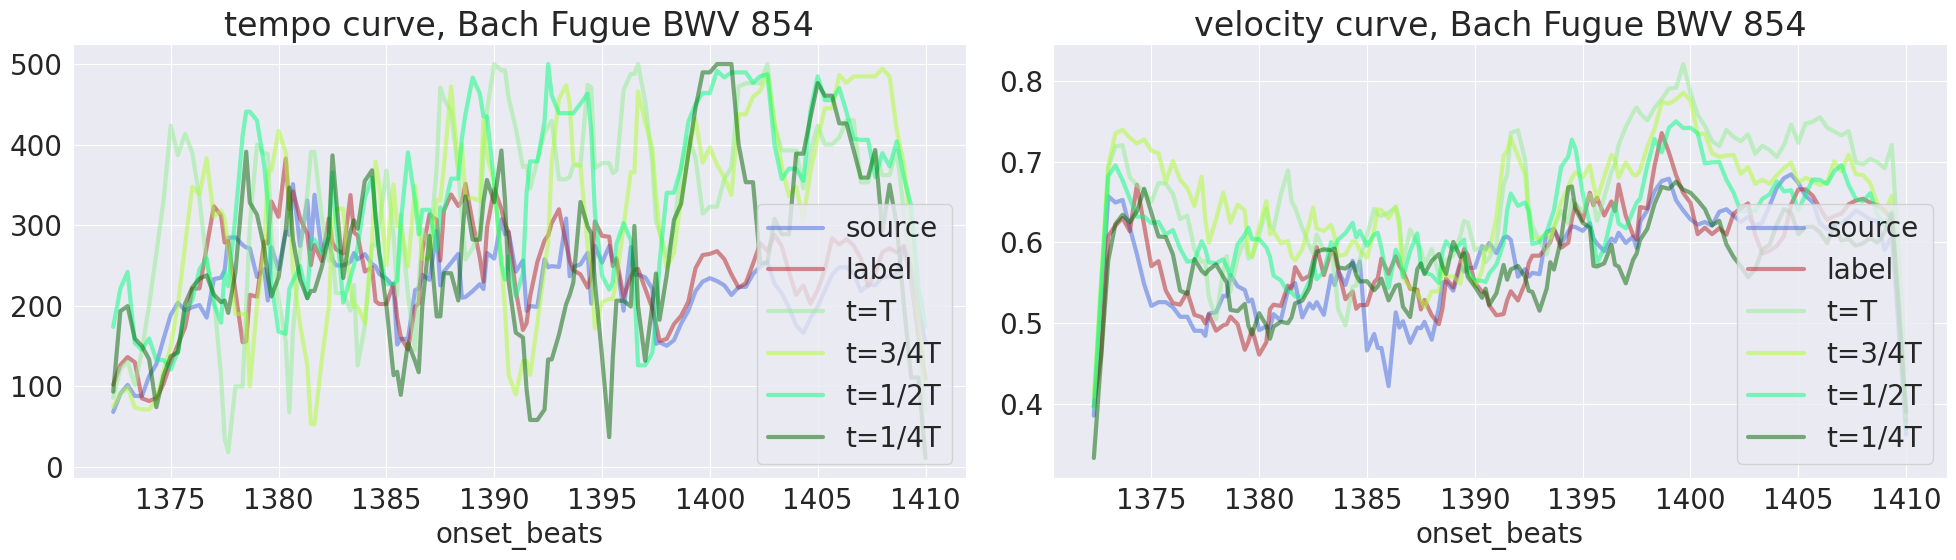

In [14]:
from scipy.stats import pearsonr

plt.rcParams['font.size'] = 20
sns.set_style('darkgrid')

fig, ax = plt.subplots(1, 2, figsize=(20, 6))

GT_tempos, GT_vels = [], []
labels = [ "source", "label",
    "t=T", 
    "t=3/4T", "t=1/2T", "t=1/4T"]
colors = [ 'royalblue', 'firebrick', 'lightgreen', 'greenyellow', 'springgreen', 'darkgreen']
for idx, name in enumerate([SOURCE, LABEL,
                        DX, DX34, DX12, DX14]):
    # N = min(len(na), len(pcodec))
    # joint_pcodec = rfn.merge_arrays([na[:N], pcodec[:N]], flatten = True, usemask = False)
    # bp = [joint_pcodec[joint_pcodec['onset_beat'] == ob]['beat_period'].mean() for ob in onset_beats]
    # vel = [joint_pcodec[joint_pcodec['onset_beat'] == ob]['velocity'].mean() for ob in onset_beats]
    # tempo_curve, velocity_curve = 60 / np.array(bp), np.array(vel)
    tv_curves = pd.read_csv(f"{name}_tv_feats.csv")
    onset_beats, tempo_curve, velocity_curve = tv_curves['onset_beats'], tv_curves['performed_tempo'], tv_curves['performed_vel']
    tempo_curve = np.clip(tempo_curve, 0, 500)

    sf = 5
    tempo_curve_smooth = np.convolve(tempo_curve, np.ones(sf)/sf, mode='same')
    velocity_curve_smooth = np.convolve(velocity_curve, np.ones(sf)/sf, mode='same')

    if np.isinf(tempo_curve).any():
        raise RuntimeError("inf in tempo")

    sns.lineplot(x=onset_beats, y=tempo_curve_smooth, ax=ax[0], label=labels[idx], alpha=0.5, c=colors[idx], estimator=None, linewidth=3)
    sns.lineplot(x=onset_beats, y=velocity_curve_smooth, ax=ax[1], label=labels[idx], alpha=0.5, c=colors[idx], estimator=None, linewidth=3)

    if idx == 0:
        source_tempo = tempo_curve_smooth
        source_velocity = velocity_curve_smooth
    elif idx == 1:
        label_tempo = tempo_curve_smooth
        label_velocity = velocity_curve_smooth
    else:
        print(idx)
        print(pearsonr(tempo_curve_smooth, source_tempo).statistic, pearsonr(velocity_curve_smooth, source_velocity).statistic)
        print(pearsonr(tempo_curve_smooth, label_tempo).statistic, pearsonr(velocity_curve_smooth, label_velocity).statistic)

ax[0].set_title('tempo curve, Bach Fugue BWV 854')
ax[1].set_title('velocity curve, Bach Fugue BWV 854')

plt.tight_layout()
plt.legend()



In [3]:
T_SAMPLES_DIR = 'artifacts/samples/EVAL-dexter1'
T34_SAMPLES_DIR = 'artifacts/samples/EVAL-dexter34'
T12_SAMPLES_DIR = 'artifacts/samples/EVAL-dexter12'
T14_SAMPLES_DIR = 'artifacts/samples/EVAL-dexter14'

t_tv_dir1 = glob.glob(f"{T_SAMPLES_DIR}/**/*_distribution_all.csv", recursive=True)
t_tv_dir2 = glob.glob(f"{T_SAMPLES_DIR}/**/*label_distribution*.csv", recursive=True)
t34_tv_dir1 = glob.glob(f"{T34_SAMPLES_DIR}/**/*_distribution_all.csv", recursive=True)
t34_tv_dir2 = glob.glob(f"{T34_SAMPLES_DIR}/**/*label_distribution*.csv", recursive=True)
t12_tv_dir1 = glob.glob(f"{T12_SAMPLES_DIR}/**/*_distribution_all.csv", recursive=True)
t12_tv_dir2 = glob.glob(f"{T12_SAMPLES_DIR}/**/*label_distribution*.csv", recursive=True)
t14_tv_dir1 = glob.glob(f"{T14_SAMPLES_DIR}/**/*_distribution_all.csv", recursive=True)
t14_tv_dir2 = glob.glob(f"{T14_SAMPLES_DIR}/**/*label_distribution*.csv", recursive=True)


In [6]:
get_table_mean(t_tv_dir1, t_tv_dir2)

number of available distribution in dir1: 467
number of available distribution in dir2: 2779


,articulation_feature.kor,asynchrony_feature.pitch_cor,asynchrony_feature.delta,dynamics_feature.agreement,dynamics_feature.consistency_std,dynamics_feature.ramp_cor,dynamics_feature.tempo_cor,pedal_feature.onset_value,tempo_curve,vel_curve
Deviation,2.227418,-2.201569,3.354314,-0.004960,0.634119,-0.312110,0.518792,-2.174713,2.700119,1.426953
KL Divergence,1.897504,0.206503,1.272232,0.062557,0.262862,0.424476,0.857222,0.330566,3.673089,0.696365
Correlation,0.106465,0.571445,0.256935,0.094327,0.922553,0.151733,0.031066,0.021386,0.147272,0.123800


In [4]:
get_table_mean(t_tv_dir1, t_tv_dir2, std=True)

number of available distribution in dir1: 467
number of available distribution in dir2: 2779


,articulation_feature.kor,asynchrony_feature.pitch_cor,asynchrony_feature.delta,dynamics_feature.agreement,dynamics_feature.consistency_std,dynamics_feature.ramp_cor,dynamics_feature.tempo_cor,pedal_feature.onset_value,tempo_curve,vel_curve
Deviation,2.827842,1.640782,2.300024,1.042290,2.087795,2.437815,1.660417,2.117455,2.628379,2.133573
KL Divergence,4.670876,0.345041,3.221978,0.046462,0.403592,1.224641,5.256400,0.358324,8.992431,1.342783
Correlation,0.177811,0.255901,0.215423,0.787179,0.162952,0.716174,0.399068,0.141506,0.176855,0.224836


In [7]:
get_table_mean(t34_tv_dir1, t34_tv_dir2)

number of available distribution in dir1: 458
number of available distribution in dir2: 2792


,articulation_feature.kor,asynchrony_feature.pitch_cor,asynchrony_feature.delta,dynamics_feature.agreement,dynamics_feature.consistency_std,dynamics_feature.ramp_cor,dynamics_feature.tempo_cor,pedal_feature.onset_value,tempo_curve,vel_curve
Deviation,2.356035,-2.214449,3.559623,-0.063618,0.868095,-0.275600,0.514542,-2.145447,2.786872,1.407804
KL Divergence,2.163611,0.195975,1.256834,0.065995,0.583545,0.453233,0.936822,0.341372,3.555135,0.777269
Correlation,0.114960,0.583758,0.247712,0.024038,0.917756,0.156677,0.022172,0.027432,0.157062,0.119314


In [5]:
get_table_mean(t34_tv_dir1, t34_tv_dir2, std=True)

number of available distribution in dir1: 458
number of available distribution in dir2: 2792


,articulation_feature.kor,asynchrony_feature.pitch_cor,asynchrony_feature.delta,dynamics_feature.agreement,dynamics_feature.consistency_std,dynamics_feature.ramp_cor,dynamics_feature.tempo_cor,pedal_feature.onset_value,tempo_curve,vel_curve
Deviation,2.659799,1.633485,2.080964,1.081111,2.187350,2.530922,1.726703,2.154579,2.552593,2.164568
KL Divergence,6.046818,0.344798,2.527229,0.051540,1.638616,1.238887,5.761786,0.380458,8.838589,1.755233
Correlation,0.176988,0.247188,0.210878,0.776065,0.149580,0.702128,0.393261,0.134444,0.172318,0.216463


In [8]:
get_table_mean(t12_tv_dir1, t12_tv_dir2)

number of available distribution in dir1: 443
number of available distribution in dir2: 2758


,articulation_feature.kor,asynchrony_feature.pitch_cor,asynchrony_feature.delta,dynamics_feature.agreement,dynamics_feature.consistency_std,dynamics_feature.ramp_cor,dynamics_feature.tempo_cor,pedal_feature.onset_value,tempo_curve,vel_curve
Deviation,2.493769,-2.170421,3.553357,-0.203870,0.697405,-0.067419,0.559402,-2.123964,2.942671,1.336596
KL Divergence,2.015722,0.194281,1.609792,0.063302,0.280347,0.427234,0.987018,0.312214,5.016739,0.636084
Correlation,0.104173,0.563288,0.249430,0.110874,0.917994,0.116125,0.035383,0.019108,0.154116,0.119522


In [6]:
get_table_mean(t12_tv_dir1, t12_tv_dir2, std=True)

number of available distribution in dir1: 443
number of available distribution in dir2: 2758


,articulation_feature.kor,asynchrony_feature.pitch_cor,asynchrony_feature.delta,dynamics_feature.agreement,dynamics_feature.consistency_std,dynamics_feature.ramp_cor,dynamics_feature.tempo_cor,pedal_feature.onset_value,tempo_curve,vel_curve
Deviation,2.721691,1.647822,2.152294,1.042755,2.198968,2.492060,1.662669,2.162622,2.497827,2.100598
KL Divergence,5.582609,0.290557,3.821245,0.050452,0.483496,0.990016,4.702120,0.316202,12.416899,1.397207
Correlation,0.172199,0.250525,0.217762,0.806910,0.166619,0.714770,0.402039,0.136976,0.176498,0.222554


In [9]:
get_table_mean(t14_tv_dir1, t14_tv_dir2)

number of available distribution in dir1: 437
number of available distribution in dir2: 2663


,articulation_feature.kor,asynchrony_feature.pitch_cor,asynchrony_feature.delta,dynamics_feature.agreement,dynamics_feature.consistency_std,dynamics_feature.ramp_cor,dynamics_feature.tempo_cor,pedal_feature.onset_value,tempo_curve,vel_curve
Deviation,2.592411,-2.108975,3.481061,-0.049474,0.297452,-0.117354,0.536730,-2.024479,2.876649,1.106122
KL Divergence,2.528792,0.164280,1.554603,0.059457,0.223568,0.591369,0.921976,0.726598,6.483668,0.373832
Correlation,0.067641,0.504521,0.231933,0.119694,0.915727,0.084827,0.018018,0.008028,0.114802,0.083389


In [7]:
get_table_mean(t14_tv_dir1, t14_tv_dir2, std=True)

number of available distribution in dir1: 437
number of available distribution in dir2: 2663


,articulation_feature.kor,asynchrony_feature.pitch_cor,asynchrony_feature.delta,dynamics_feature.agreement,dynamics_feature.consistency_std,dynamics_feature.ramp_cor,dynamics_feature.tempo_cor,pedal_feature.onset_value,tempo_curve,vel_curve
Deviation,2.948290,1.633073,2.273310,1.070733,1.924106,2.571327,1.720989,2.235758,2.691974,2.114437
KL Divergence,7.658500,0.210499,4.847908,0.045214,0.344449,1.721649,2.466818,8.726063,15.294257,0.693238
Correlation,0.167305,0.255610,0.219515,0.831706,0.167655,0.727012,0.390624,0.124328,0.160407,0.210713


## Condition w test

In [3]:
W05_SAMPLES_DIR = 'artifacts/samples/EVAL-dexterw0.5'
W1_SAMPLES_DIR = 'artifacts/samples/EVAL-dexter'
W2_SAMPLES_DIR = 'artifacts/samples/EVAL-dexterw2'
W3_SAMPLES_DIR = 'artifacts/samples/EVAL-dexterw3'

w05_tv_dir1 = glob.glob(f"{W05_SAMPLES_DIR}/**/*_distribution_all.csv", recursive=True)
w05_tv_dir2 = glob.glob(f"{W05_SAMPLES_DIR}/**/*label_distribution*.csv", recursive=True)
w1_tv_dir1 = glob.glob(f"{W1_SAMPLES_DIR}/**/*_distribution_all.csv", recursive=True)
w1_tv_dir2 = glob.glob(f"{W1_SAMPLES_DIR}/**/*label_distribution*.csv", recursive=True)
w2_tv_dir1 = glob.glob(f"{W2_SAMPLES_DIR}/**/*_distribution_all.csv", recursive=True)
w2_tv_dir2 = glob.glob(f"{W2_SAMPLES_DIR}/**/*label_distribution*.csv", recursive=True)
w3_tv_dir1 = glob.glob(f"{W3_SAMPLES_DIR}/**/*_distribution_all.csv", recursive=True)
w3_tv_dir2 = glob.glob(f"{W3_SAMPLES_DIR}/**/*label_distribution*.csv", recursive=True)


In [4]:
get_table_mean(w05_tv_dir1, w05_tv_dir2)

number of available distribution in dir1: 244
number of available distribution in dir2: 1693


,articulation_feature.kor,asynchrony_feature.pitch_cor,asynchrony_feature.delta,dynamics_feature.agreement,dynamics_feature.consistency_std,dynamics_feature.ramp_cor,dynamics_feature.tempo_cor,pedal_feature.onset_value,tempo_curve,vel_curve
Deviation,1.683722,-2.577938,3.472797,-0.286909,1.127777,-0.367540,0.307613,-2.783031,3.109483,-4.475840
KL Divergence,0.940249,0.220510,0.987089,0.064011,0.375695,2.101429,0.499769,0.201426,3.187378,9.873680
Correlation,0.088058,0.588442,0.217443,0.083156,0.935521,0.029051,0.043169,0.014338,0.111172,0.018816


In [4]:
get_table_mean(w05_tv_dir1, w05_tv_dir2, std=True)

number of available distribution in dir1: 244
number of available distribution in dir2: 1693


,articulation_feature.kor,asynchrony_feature.pitch_cor,asynchrony_feature.delta,dynamics_feature.agreement,dynamics_feature.consistency_std,dynamics_feature.ramp_cor,dynamics_feature.tempo_cor,pedal_feature.onset_value,tempo_curve,vel_curve
Deviation,2.814070,1.497837,2.049225,1.018363,2.482686,2.696510,1.587820,1.883342,2.461107,1.100803
KL Divergence,1.576208,0.216424,3.062677,0.052607,0.571290,9.686485,1.883356,0.181128,6.474552,22.713635
Correlation,0.160353,0.276317,0.201091,0.782631,0.121345,0.722525,0.379595,0.131622,0.159385,0.226360


In [5]:
get_table_mean(w1_tv_dir1, w1_tv_dir1)

number of available distribution in dir1: 498
number of available distribution in dir2: 498


,articulation_feature.kor,asynchrony_feature.pitch_cor,asynchrony_feature.delta,dynamics_feature.agreement,dynamics_feature.consistency_std,dynamics_feature.ramp_cor,dynamics_feature.tempo_cor,pedal_feature.onset_value,tempo_curve,vel_curve
Deviation,2.236841,-2.177490,3.435486,-0.027532,0.738609,-0.280998,0.577490,-2.195320,2.721552,1.487977
KL Divergence,1.642130,0.201349,1.290560,0.065082,0.285808,0.426701,0.967587,0.336464,4.263473,0.711357
Correlation,0.121414,-0.050674,0.275758,0.131107,0.939999,0.007177,0.047132,0.037616,0.065486,0.161101


In [5]:
get_table_mean(w1_tv_dir1, w1_tv_dir1, std=True)

number of available distribution in dir1: 498
number of available distribution in dir2: 498


,articulation_feature.kor,asynchrony_feature.pitch_cor,asynchrony_feature.delta,dynamics_feature.agreement,dynamics_feature.consistency_std,dynamics_feature.ramp_cor,dynamics_feature.tempo_cor,pedal_feature.onset_value,tempo_curve,vel_curve
Deviation,2.762736,1.656787,2.211605,1.050484,2.218119,2.445407,1.662917,2.133051,2.655413,2.122438
KL Divergence,3.637267,0.338788,3.167221,0.048646,0.496696,1.131849,7.746528,0.364597,10.660476,1.377119
Correlation,0.183607,0.226185,0.204874,0.753579,0.110082,0.732515,0.405518,0.130961,0.134225,0.258264


In [6]:
get_table_mean(w2_tv_dir1, w2_tv_dir1)

number of available distribution in dir1: 399
number of available distribution in dir2: 399


,articulation_feature.kor,asynchrony_feature.pitch_cor,asynchrony_feature.delta,dynamics_feature.agreement,dynamics_feature.consistency_std,dynamics_feature.ramp_cor,dynamics_feature.tempo_cor,pedal_feature.onset_value,tempo_curve,vel_curve
Deviation,3.208116,-2.054278,3.683261,0.043545,1.272706,-0.751912,0.567522,-1.391118,3.339010,4.020364
KL Divergence,3.637446,0.200145,1.863079,0.066729,0.920679,1.864153,0.922113,0.423355,6.851501,8.610118
Correlation,0.072584,-0.042699,0.268539,0.081384,0.941080,-0.080510,-0.006908,0.024647,0.048276,0.130111


In [6]:
get_table_mean(w2_tv_dir1, w2_tv_dir1, std=True)

number of available distribution in dir1: 399
number of available distribution in dir2: 399


,articulation_feature.kor,asynchrony_feature.pitch_cor,asynchrony_feature.delta,dynamics_feature.agreement,dynamics_feature.consistency_std,dynamics_feature.ramp_cor,dynamics_feature.tempo_cor,pedal_feature.onset_value,tempo_curve,vel_curve
Deviation,2.572093,1.729365,2.103017,1.057360,2.354378,2.458899,1.825605,2.238184,2.379398,1.534103
KL Divergence,9.047377,0.371280,4.753701,0.051311,4.456329,8.270252,3.224484,0.444003,13.292449,11.902730
Correlation,0.183706,0.219625,0.197301,0.776566,0.130912,0.760808,0.406895,0.144900,0.153496,0.244148


In [7]:
get_table_mean(w3_tv_dir1, w3_tv_dir1)

number of available distribution in dir1: 278
number of available distribution in dir2: 278


,articulation_feature.kor,asynchrony_feature.pitch_cor,asynchrony_feature.delta,dynamics_feature.agreement,dynamics_feature.consistency_std,dynamics_feature.ramp_cor,dynamics_feature.tempo_cor,pedal_feature.onset_value,tempo_curve,vel_curve
Deviation,3.514733,-2.083336,3.878646,-0.079994,1.336995,-0.429720,0.505478,-0.913065,3.860378,4.631663
KL Divergence,3.666555,0.216686,1.566970,0.066834,0.309412,2.165697,1.243215,0.551708,8.374447,21.135773
Correlation,0.039572,-0.053074,0.265522,0.096966,0.935459,-0.001065,0.003389,0.013892,0.047650,0.104714


In [7]:
get_table_mean(w3_tv_dir1, w3_tv_dir1, std=True)

number of available distribution in dir1: 278
number of available distribution in dir2: 278


,articulation_feature.kor,asynchrony_feature.pitch_cor,asynchrony_feature.delta,dynamics_feature.agreement,dynamics_feature.consistency_std,dynamics_feature.ramp_cor,dynamics_feature.tempo_cor,pedal_feature.onset_value,tempo_curve,vel_curve
Deviation,2.479141,1.763431,1.944911,1.003249,2.687872,2.731692,1.904187,2.394719,1.812103,1.115530
KL Divergence,8.464334,0.403484,3.451131,0.048989,0.437018,7.160976,4.221865,0.562471,16.748417,20.940455
Correlation,0.187563,0.220503,0.195382,0.747202,0.128363,0.724518,0.409345,0.152805,0.145198,0.239232
